# 200_load_videogame_datasets

## Purpose 

In this notebook we will be cleaning the dataset of the IGN reviews. In the previous notebook we cleaned the games console sales dataset from the last 30 years. This notebook will be focussing on cleaning the data from the IGN reviews dataset.

## Datasets

- Input : IGN_Games_Reviews.csv
- Output : Clean_IGN_Games_Reviews.pkl

In [1]:
import os 
import pandas as pd 
import matplotlib.pylab as plt 

%matplotlib inline 

In [2]:
if not os.path.exists("../../data/raw/IGN_Games_Reviews.csv"):
    print("Missing Dataset File")

## Loading the Dataset 

The dataset is stored in a csv file and we will open the file as follows 

In [3]:
# checks everything loads in correctly
IGN = pd.read_csv("../../data/raw/IGN_Games_Reviews.csv")
IGN.shape

(18625, 11)

The dataset is stored in a dataframe called IGN and the .shape function is particularly useful to identify how many rows and columns we are going to be dealing with. In this case we are dealing with 18k and 11 different columns.

We will check that the data has been loaded in correctly by printing the first 5 and last 5 lines of the dataframe

In [4]:
IGN.head()

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


Now we will aee the amount of entries for each year. This also allows us to see if there are years which we do not want.

In [5]:
# count number of releases by year
IGN.groupby('release_year')['release_year'].count()

release_year
1970       1
1996     149
1997     205
1998     339
1999     775
2000    1045
2001     688
2002     936
2003     969
2004     997
2005    1088
2006    1208
2007    1610
2008    1915
2009    1687
2010    1363
2011    1073
2012     753
2013     696
2014     537
2015     365
2016     226
Name: release_year, dtype: int64

In [6]:
# exclude 1970 as this has one value
IGN = IGN[IGN.release_year != 1970]
IGN.groupby('release_year')['release_year'].count()

release_year
1996     149
1997     205
1998     339
1999     775
2000    1045
2001     688
2002     936
2003     969
2004     997
2005    1088
2006    1208
2007    1610
2008    1915
2009    1687
2010    1363
2011    1073
2012     753
2013     696
2014     537
2015     365
2016     226
Name: release_year, dtype: int64

## Cleaning the IGN dataset

In [7]:
# getting the null values
IGN.isnull().sum()

Unnamed: 0         0
score_phrase       0
title              0
url                0
platform           0
score              0
genre             36
editors_choice     0
release_year       0
release_month      0
release_day        0
dtype: int64

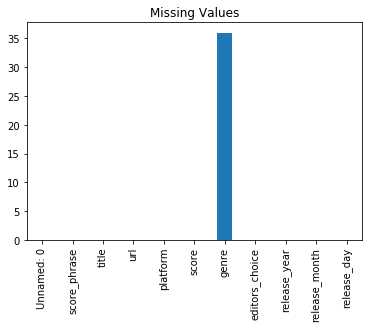

In [8]:
# visualising the columns with most missing values
IGN.isnull().sum().plot(kind='bar', title = 'Missing Values' )

In [9]:
# rename columns of title to name to match that of other dataset for merging purposes
IGN.rename(columns={'title' : 'Name'}, inplace=True)

In [10]:
# again rename the column of platform to Platform to match that of the other dataset for merging
IGN.rename(columns={'platform' : 'Platform'}, inplace=True)

In [11]:
IGN.head()

,Unnamed: 0,score_phrase,Name,url,Platform,score,genre,editors_choice,release_year,release_month,release_day
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


There are a few missing values for genre, however, we will not delete this yet as we may be able to obtain them from our other dataet.

There are two uneede columns: unnamed and url, so we will delete these.

In [12]:
# delete the unecessary columns of unnamed, and url as we wont need these
del IGN['Unnamed: 0']
del IGN['url']
IGN.head()

,score_phrase,Name,Platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,Splice: Tree of Life,iPad,8.5,Puzzle,N,2012,9,12
3,Great,NHL 13,Xbox 360,8.5,Sports,N,2012,9,11
4,Great,NHL 13,PlayStation 3,8.5,Sports,N,2012,9,11


In [13]:
# create a new column called date  which will map the string of release year month and day and use a delimiter '-' in between each one so it will be in a date month and year format 
IGN['Date'] = IGN['release_year'].map(str) + '-' + IGN['release_month'].map(str)+ '-'  + IGN['release_day'].map(str)
IGN.head()

,score_phrase,Name,Platform,score,genre,editors_choice,release_year,release_month,release_day,Date
0,Amazing,LittleBigPlanet PS Vita,PlayStation Vita,9.0,Platformer,Y,2012,9,12,2012-9-12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,PlayStation Vita,9.0,Platformer,Y,2012,9,12,2012-9-12
2,Great,Splice: Tree of Life,iPad,8.5,Puzzle,N,2012,9,12,2012-9-12
3,Great,NHL 13,Xbox 360,8.5,Sports,N,2012,9,11,2012-9-11
4,Great,NHL 13,PlayStation 3,8.5,Sports,N,2012,9,11,2012-9-11


Now we will make a time series since we have the day month and year and then delete these columns

In [14]:
# converting the string of date into a datetime timseries 
IGN['Date'] =  pd.to_datetime(IGN['Date'])

In [15]:
# we have the release year, month and day in a time series so it is time to delete the columns of year month and day
del IGN['release_year']
del IGN['release_month']
del IGN['release_day']
IGN.head()

,score_phrase,Name,Platform,score,genre,editors_choice,Date
0,Amazing,LittleBigPlanet PS Vita,PlayStation Vita,9.0,Platformer,Y,2012-09-12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,PlayStation Vita,9.0,Platformer,Y,2012-09-12
2,Great,Splice: Tree of Life,iPad,8.5,Puzzle,N,2012-09-12
3,Great,NHL 13,Xbox 360,8.5,Sports,N,2012-09-11
4,Great,NHL 13,PlayStation 3,8.5,Sports,N,2012-09-11


Changing the Platform Column so that it will match that platform column of our game sales total. This is necessary for us to complete before we can merge the datasets. Lets check the unique platforms so we don't miss any platforms when we are changing the abbreviation.

In [16]:
# unique paltforms
IGN['Platform'].unique()

array(['PlayStation Vita', 'iPad', 'Xbox 360', 'PlayStation 3',
       'Macintosh', 'PC', 'iPhone', 'Nintendo DS', 'Nintendo 3DS',
       'Android', 'Wii', 'PlayStation 4', 'Wii U', 'Linux',
       'PlayStation Portable', 'PlayStation', 'Nintendo 64', 'Saturn',
       'Lynx', 'Game Boy', 'Game Boy Color', 'NeoGeo Pocket Color',
       'Game.Com', 'Dreamcast', 'Dreamcast VMU', 'WonderSwan', 'Arcade',
       'Nintendo 64DD', 'PlayStation 2', 'WonderSwan Color',
       'Game Boy Advance', 'Xbox', 'GameCube', 'DVD / HD Video Game',
       'Wireless', 'Pocket PC', 'N-Gage', 'NES', 'iPod', 'Genesis',
       'TurboGrafx-16', 'Super NES', 'NeoGeo', 'Master System',
       'Atari 5200', 'TurboGrafx-CD', 'Atari 2600', 'Sega 32X', 'Vectrex',
       'Commodore 64/128', 'Sega CD', 'Nintendo DSi', 'Windows Phone',
       'Web Games', 'Xbox One', 'Windows Surface', 'Ouya',
       'New Nintendo 3DS', 'SteamOS'], dtype=object)

As seen below we will store the new abbreviated and changed platform column in a new dataframe called IGN_NEW. We changed the full names to the abbreviated names used in the game sales all time so that they match when we merge them. 

In [17]:
# renaming current strings in the rows for consoles to match that of the all time sales so it can be merged
IGN_NEW = IGN.replace({'Xbox 360' : 'X360', 'PlayStation 3' : 'PS3' , 'PlayStation Vita' : 'PSV', 'PlayStation 4' : 'PS4', 
            'Xbox' : 'XB', 'PlayStation 2' : 'PS2', 'Nintendo DS' : 'DS', 'Game Boy' : 'GB',
            'PlayStation': 'PS', 'Wii' : 'Wii', 'Game Boy Advance' : 'GBA', 'PlayStation Portable' : 'PSP', 
            'Nintendo 3DS' : '3DS', 'Super NES' : 'SNES' , 'Xbox One' : 'Xone', 'Nintendo 64' : 'N64' ,
            'Atari 2600' : '2600' , 'Xbox' : 'XB', 'GameCube' : 'GC' , 'Ninendo Switch' : 'NS', 'Wii U' : 'WiiU', 
            'Game Gear' : 'GG', 'Sega Saturn' : 'SAT', 'Dreamcast': 'DC', 'Atari 7800' : '7800', 'XB One' : 'Xone'}, regex=True)


In [18]:
# check the platforms were renamed correctly
IGN_NEW.tail()

,score_phrase,Name,Platform,score,genre,editors_choice,Date
18620,Good,Tokyo Mirage Sessions #FE,WiiU,7.6,RPG,N,2016-06-29
18621,Amazing,LEGO Star Wars: The Force Awakens,PS4,9.0,"Action, Adventure",Y,2016-06-29
18622,Mediocre,Star Ocean: Integrity and Faithlessness,PS4,5.8,RPG,N,2016-06-28
18623,Masterpiece,Inside,Xone,10.0,Adventure,Y,2016-06-28
18624,Masterpiece,Inside,PC,10.0,Adventure,Y,2016-06-28


## Saving the Dataset

For now lets save the dataset to a new file

The dataset will be saved into a pickle file. 

In [19]:
cols = IGN_NEW.columns

### Saving to Pickle file

In [20]:
IGN_NEW[cols].to_pickle("../../data/prep/Clean_IGN_Games_Reviews.pkl")